In [ ]:
# loading in some basic packages
import numpy as np                           # basic data operations
from scipy.spatial import distance
import matplotlib.pyplot as plt
from dtw import dtw, dtwPlot

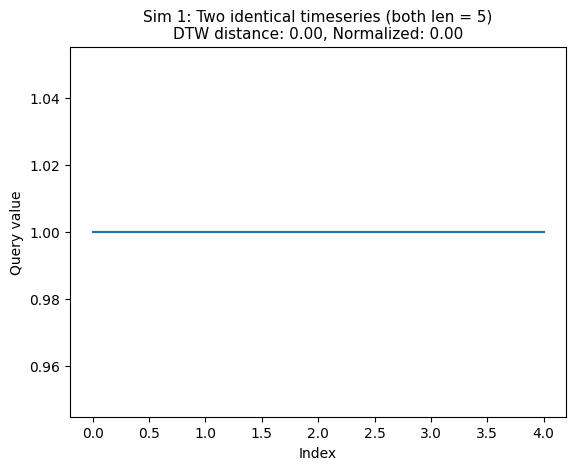

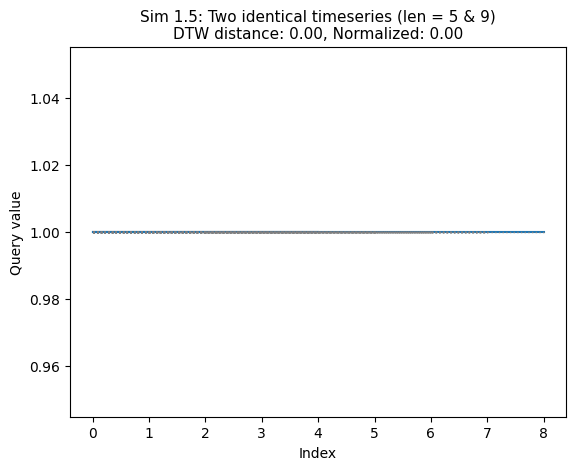

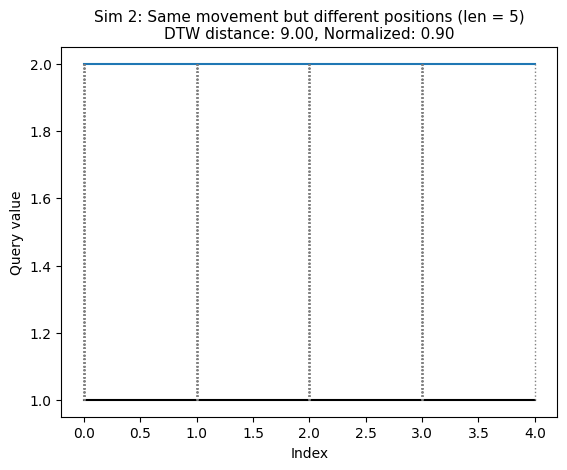

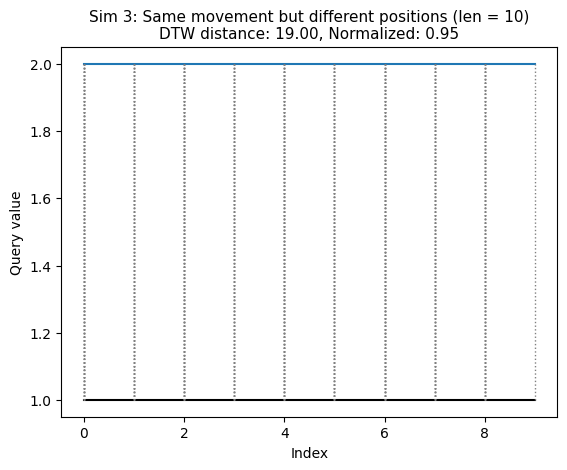

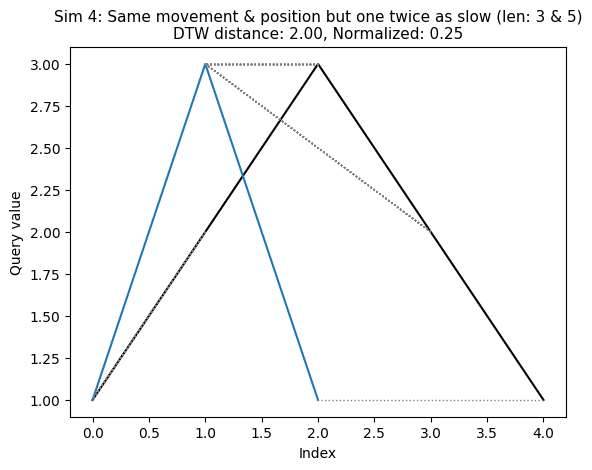

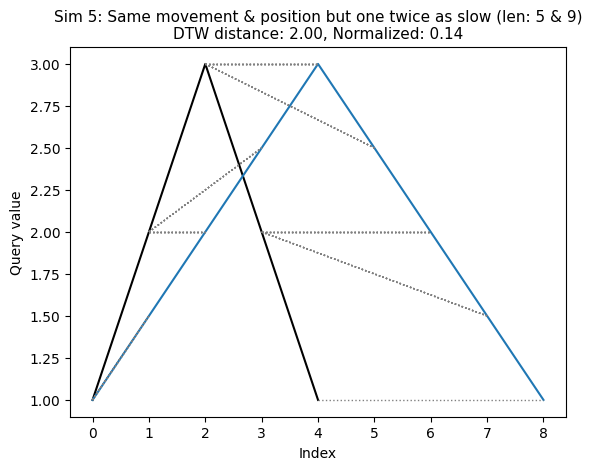

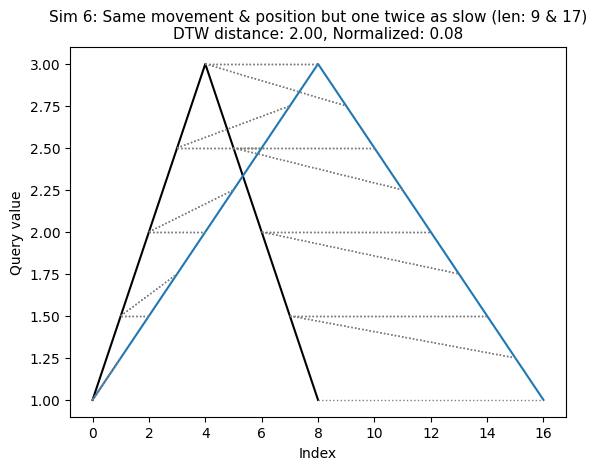

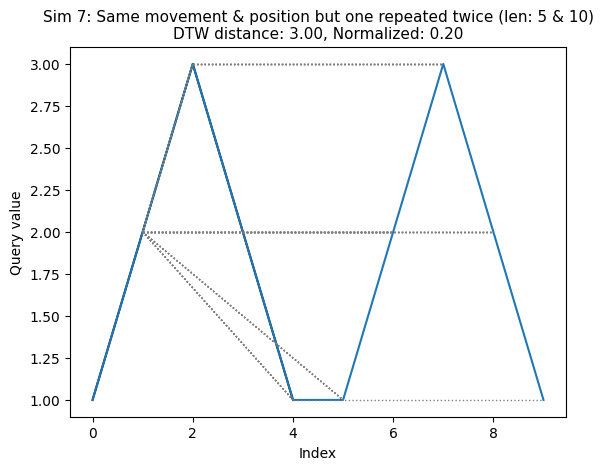

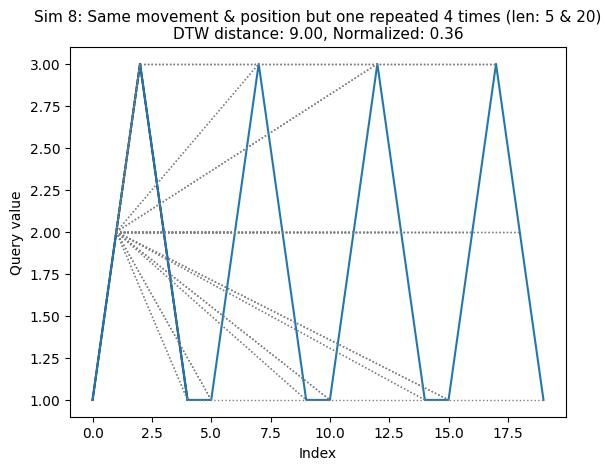

In [46]:
# compute the distance using DTW
def compute_dtw(ts1, ts2, title=None):
    window_size = min(len(ts1), len(ts2)) // 10 # the window size is 10% of the length of the shortest timeseries
    if window_size < 3:
        window_size = 3 # the window size should be at least 3 frames

    res = dtw(ts1, ts2, 
                keep_internals = True,
                step_pattern = "symmetric2",
                window_args= {"window_type": "sakoechiba", "window_size": window_size})
    dis = res.distance
    dis_normalized = res.normalizedDistance
    # add the result as the title of the plot
    dtwPlot(res, type="twoway")
    title = title + "\n" if title != None else ""
    plt.title(title + f"DTW distance: {dis:.2f}, Normalized: {dis_normalized:.2f}", fontsize=11)



### Simulation 1: Two identical timeseries
sim_ts_1 = np.array([1, 1, 1, 1, 1])
title = "Sim 1: Two identical timeseries (both len = 5)"
compute_dtw(sim_ts_1, sim_ts_1, title)

### Simulation 1.5: Two identical timeseries with different length
sim_ts_1_5 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
title = "Sim 1.5: Two identical timeseries (len = 5 & 9)"
compute_dtw(sim_ts_1, sim_ts_1_5, title)


### Simulation 2: Same pattern, different positions
sim_ts_2 = np.array([2, 2, 2, 2, 2])
title = "Sim 2: Same movement but different positions (len = 5)"
compute_dtw(sim_ts_1, sim_ts_2, title)

### Simulation 3: Longer timeseries with same pattern as Simulation 2
sim_ts_3 = np.array([1, 1, 1, 1, 1, 
                        1, 1, 1, 1, 1])
sim_ts_4 = np.array([2, 2, 2, 2, 2,
                        2, 2, 2, 2, 2])
title = "Sim 3: Same movement but different positions (len = 10)"
compute_dtw(sim_ts_3, sim_ts_4, title)

    
### Simulation 4: same movement & position, different speed (length: 3 & 5)
sim_ts_5 = np.array([1, 2, 3, 2, 1])
sim_ts_6 = np.array([1, 3, 1])
title = "Sim 4: Same movement & position but one twice as slow (len: 3 & 5)"
compute_dtw(sim_ts_5, sim_ts_6, title)


### Simulation 5: same movement, different speed (length: 5 & 9)
sim_ts_7 = np.array([1, 1.5, 2, 2.5, 3, 2.5, 2, 1.5, 1])
title = "Sim 5: Same movement & position but one twice as slow (len: 5 & 9)"
compute_dtw(sim_ts_5, sim_ts_7, title)


### Simulation 6: same movement, different speed (length: 9 & 17)
sim_ts_8 = np.array([1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 
                        2.75, 2.5, 2.25, 2, 1.75, 1.5, 1.25, 1])
title = "Sim 6: Same movement & position but one twice as slow (len: 9 & 17)"
compute_dtw(sim_ts_7, sim_ts_8, title)


### Simulation 7: same movement, one repeated twice
sim_ts_9 = np.array([1, 2, 3, 2, 1, 
                    1, 2, 3, 2, 1])
title = "Sim 7: Same movement & position but one repeated twice (len: 5 & 10)"
compute_dtw(sim_ts_5, sim_ts_9, title)


### Simulation 8: same movement, one repeated thrice, different speed
sim_ts_10 = np.array([1, 2, 3, 2, 1, 
                    1, 2, 3, 2, 1,
                    1, 2, 3, 2, 1,
                    1, 2, 3, 2, 1])
title = "Sim 8: Same movement & position but one repeated 4 times (len: 5 & 20)"
compute_dtw(sim_ts_5, sim_ts_10, title)

Insights:

1. Original and normalize distance both return 0 for identical movements (Sim 1 & 1.5).
2. Original DTW is hugely affected by the duration of movements if identical movements are produced in different positions, but normalized DTW is much less affected by the duration in such cases (Sim 2 & 3).
3. Original and normalized DTW is sensitive to difference in speed (distance won't be 0; Sim 4--6).
4. Original DTW distance is insensitive to duration when two movements are identical but in different speed. This means that normalized distance is affected by duration in this case (shorter total length leads to higher distance; Sim 4--6).
5. Original DTW distance linearly increases when one person produces a movement and the other person produces the same movement repeatedly, while the increase in normalized distance is non-linear (Sim 7 & 8). For example, original DTW distance is 3 times higher in Sim 8 than Sim 7 because Sim 8 has two more extra repetitions (each repition costs distance of 3), but the normalized distance is only 1.8 times higher.